# Preparing the test data
- Test data obtained from Kaggle - programgeek01/anime-music-midi. Please see the notebook in the folder 'kaggle' for the codebook on how the data was extracted from Kaggle.
- Chosen anime classical music as it is most similar to the train dataset, which consists of mainly Final Fantasy soundtracks, a popular Japanese Role Playing Game (JRPG).

In [1]:
from music21 import converter, instrument, stream, note, chord
import glob

In [2]:
# import the data and seperate into songs
# same method as train data

# let's seperate up the sequence by songs.
# 1 song in 1 list

notes_format = []
failed_file_count = 0
for file in glob.glob("../kaggle/data/anime/*.mid"):
    
    try:
        midi = converter.parse(file)
        print(f'Parsing {file}') # to keep track of progress
        notes_to_parse = None
        
    except:
        print(f'failed to find time signature for file {file}') # in case file cannot be read
        failed_file_count+=1
    
    notes_to_parse = midi.flat.notes
    
    notes = []
# we are interested in getting the notes and chords
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch)+ " " +  str(element.quarterLength)) # add note and time sig
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder) + " " +  str(element.quarterLength)) # convert a chord into it's numerical elements
        elif isinstance(element, note.Rest):
            notes.append(str(element.name)  + " " + str(element.quarterLength))
            
    notes_format.append([notes, file])

Parsing ../kaggle/data/anime/Tokyo Ghoul Unravel.mid
Parsing ../kaggle/data/anime/Sentimental_Crisis.mid
Parsing ../kaggle/data/anime/Dango Daikazoku.mid
Parsing ../kaggle/data/anime/goblin_ost7__fonzi_m_.mid
Parsing ../kaggle/data/anime/Aqua Terrarium .mid
Parsing ../kaggle/data/anime/Nezukos_Theme.mid
Parsing ../kaggle/data/anime/[divine_gate_op]_one-me_two-hearts_-_hitorie__fonzi_m_.mid
Parsing ../kaggle/data/anime/Vogel im Käfig.mid
Parsing ../kaggle/data/anime/Suiheisen.mid
Parsing ../kaggle/data/anime/Niji_no_Kanata_ni_instrumental.mid
Parsing ../kaggle/data/anime/Swordland - SAO.mid
Parsing ../kaggle/data/anime/Shelter - Porter Robinson _ Madeon.mid
Parsing ../kaggle/data/anime/[rezero_kara_hajimeru_isekai_seikatsu_ed_2]_stay_alive_-_rie_takahashi__fonzi_m_.mid
Parsing ../kaggle/data/anime/[fuuka_op]_climbers_high_-_manami_numakura__fonzi_m_.mid
Parsing ../kaggle/data/anime/Accel World - Bye Bye.mid
Parsing ../kaggle/data/anime/Renai_Circulation_tv.mid
Parsing ../kaggle/data/an

Parsing ../kaggle/data/anime/Within.mid


In [3]:
len(notes_format)

130

The number of songs in the test set is **130**, which exceeds that of the train set at **92**.

<br>
We will now look at the lengths of the songs to see which are shorter than 100 notes. Since we are passing a sequence of 100 notes into the model, the song will not be of use if it has less than 100 notes.

In [4]:
# get songs length and name for songs that have less than 100 notes
[(len(song[0]), song[1]) for song in notes_format if len(song[0])<=100]

[]

None of the songs have less than 100 notes. The test set is good to go!

## Song length analysis

In [39]:
song_lengths = [len(song[0]) for song in notes_format]

In [40]:
print(f'The average song length is {round(sum(song_lengths)/len(song_lengths),2)} elements.')

The average song length is 749.42 elements.


The average song length for the test data is **749.42** elements, which is higher than that of the train data's at **677.9** elements.

In [42]:
import matplotlib.pyplot as plt

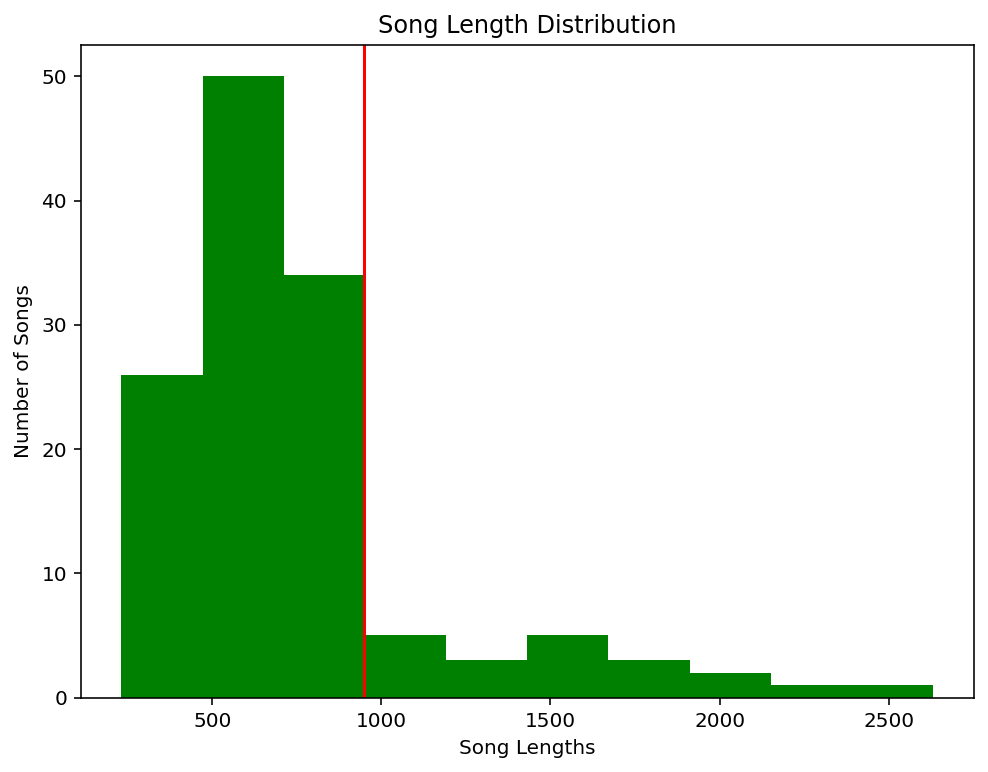

In [46]:
plt.figure(figsize=(8,6))
plt.hist(song_lengths, color='green')
plt.xlabel('Song Lengths')
plt.ylabel('Number of Songs')
plt.axvline(x=950, c='red')
plt.title('Song Length Distribution');

From the distribution, we can see that most songs are less than 950 elements in length.

## Seperating the durations from notes and chords

We will now seperate the song notes and durations, similar to what was done for the train dataset.

In [5]:
notes_new_format = []
time_new_format = []
failed_file_count = 0
for file in glob.glob("../kaggle/data/anime/*.mid"):
    
    try:
        midi = converter.parse(file)
        print(f'Parsing {file}') # to keep track of progress
        notes_to_parse = None

    except:
        print(f'failed to find time signature for file {file}') # in case file cannot be read
        failed_file_count+=1

    notes_to_parse = midi.flat.notes

    notes = []
    time = []
# we are interested in getting the notes and chords
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch)) # get note
            time.append(str(element.quarterLength)) # get duration
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder)) # get chord
            time.append(str(element.quarterLength)) # get duration
        elif isinstance(element, note.Rest):
            notes.append(str(element.name)) # get rest
            time.append(str(element.quarterLength)) # get duration

    notes_new_format.append(notes)
    time_new_format.append(time)

Parsing ../kaggle/data/anime/Tokyo Ghoul Unravel.mid
Parsing ../kaggle/data/anime/Sentimental_Crisis.mid
Parsing ../kaggle/data/anime/Dango Daikazoku.mid
Parsing ../kaggle/data/anime/goblin_ost7__fonzi_m_.mid
Parsing ../kaggle/data/anime/Aqua Terrarium .mid
Parsing ../kaggle/data/anime/Nezukos_Theme.mid
Parsing ../kaggle/data/anime/[divine_gate_op]_one-me_two-hearts_-_hitorie__fonzi_m_.mid
Parsing ../kaggle/data/anime/Vogel im Käfig.mid
Parsing ../kaggle/data/anime/Suiheisen.mid
Parsing ../kaggle/data/anime/Niji_no_Kanata_ni_instrumental.mid
Parsing ../kaggle/data/anime/Swordland - SAO.mid
Parsing ../kaggle/data/anime/Shelter - Porter Robinson _ Madeon.mid
Parsing ../kaggle/data/anime/[rezero_kara_hajimeru_isekai_seikatsu_ed_2]_stay_alive_-_rie_takahashi__fonzi_m_.mid
Parsing ../kaggle/data/anime/[fuuka_op]_climbers_high_-_manami_numakura__fonzi_m_.mid
Parsing ../kaggle/data/anime/Accel World - Bye Bye.mid
Parsing ../kaggle/data/anime/Renai_Circulation_tv.mid
Parsing ../kaggle/data/an

Parsing ../kaggle/data/anime/Within.mid


In [7]:
# check that the lengths are equal
print(len(notes_new_format))
print(len(time_new_format))

130
130


Now that the lengths are equal, we can proceed to export the data as pickle files.

In [9]:
import pickle

In [10]:
# save song_notes
with open('../assets_test_songs/song_notes', 'wb') as filepath:
    pickle.dump(notes_new_format, filepath)
    
# save song_times
with open('../assets_test_songs/song_times', 'wb') as filepath:
    pickle.dump(time_new_format, filepath)

## Notes/Chords and Durations Analysis

We will first need to extract the individual notes and times into a long sequence.

In [11]:
notes = []
time = []
failed_file_count = 0
for file in glob.glob("../kaggle/data/anime/*.mid"):

    try:
        midi = converter.parse(file)
        print(f'Parsing {file}') # to keep track of progress
        notes_to_parse = None

    except:
        print(f'failed to find time signature for file {file}') # in case file cannot be read
        failed_file_count+=1

    notes_to_parse = midi.flat.notes

# we are interested in getting the notes and chords
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
            time.append(str(element.quarterLength))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
            time.append(str(element.quarterLength))
        elif isinstance(element, note.Rest):
            notes.append(str(element.name))
            time.append(str(element.quarterLength))

Parsing ../kaggle/data/anime/Tokyo Ghoul Unravel.mid
Parsing ../kaggle/data/anime/Sentimental_Crisis.mid
Parsing ../kaggle/data/anime/Dango Daikazoku.mid
Parsing ../kaggle/data/anime/goblin_ost7__fonzi_m_.mid
Parsing ../kaggle/data/anime/Aqua Terrarium .mid
Parsing ../kaggle/data/anime/Nezukos_Theme.mid
Parsing ../kaggle/data/anime/[divine_gate_op]_one-me_two-hearts_-_hitorie__fonzi_m_.mid
Parsing ../kaggle/data/anime/Vogel im Käfig.mid
Parsing ../kaggle/data/anime/Suiheisen.mid
Parsing ../kaggle/data/anime/Niji_no_Kanata_ni_instrumental.mid
Parsing ../kaggle/data/anime/Swordland - SAO.mid
Parsing ../kaggle/data/anime/Shelter - Porter Robinson _ Madeon.mid
Parsing ../kaggle/data/anime/[rezero_kara_hajimeru_isekai_seikatsu_ed_2]_stay_alive_-_rie_takahashi__fonzi_m_.mid
Parsing ../kaggle/data/anime/[fuuka_op]_climbers_high_-_manami_numakura__fonzi_m_.mid
Parsing ../kaggle/data/anime/Accel World - Bye Bye.mid
Parsing ../kaggle/data/anime/Renai_Circulation_tv.mid
Parsing ../kaggle/data/an

Parsing ../kaggle/data/anime/A Tender Feeling.mid
Parsing ../kaggle/data/anime/Within.mid


In [13]:
# check the lengths of notes and time.
# they should be of equal length
print(len(notes))
print(len(time))

97424
97424


The total length of the notes and durations for the test data is **97424**, which is higher than that of our train data at **62367**.

In [14]:
# get unique pitchnames
pitchnames = sorted(set(item for item in notes))

# get unique timenames
timenames = sorted(set(item for item in time))

print(f'{len(pitchnames)} unique elements in pitchnames.')
print(f'{len(timenames)} unique durations in timenames.')

437 unique elements in pitchnames.
70 unique durations in timenames.


There are **437** unique pitchnames in the test data, which is higher than that of the train data, which has **382** unique pitchnames.<br>

However, there are **70** unique timenames (durations) for the test data, which is lesser than that of the train data, which as **173** unique timenames.<br>

This shows that although the test data is longer and has more unique notes/chords than the train data, it shows less variation in the durations for the songs.|

### Top notes/chords in the test data

In [16]:
import pandas as pd

In [21]:
note_df = pd.DataFrame(notes)
note_df.rename(columns={0:'notes/chords'}, inplace=True)
print(note_df.shape)
note_df.head()

(97424, 1)


,notes/chords
0,G3
1,10.2
2,2.7
3,9.0
4,7.10


In [30]:
note_df['count'] = 1
note_df.head()

,notes/chords,count
0,G3,1
1,10.2,1
2,2.7,1
3,9.0,1
4,7.10,1


In [35]:
note_df.groupby(by='notes/chords').count().sort_values(by='count', ascending=False).head()

,count
notes/chords,
D3,1912
9,1886
2,1829
A2,1826
7,1811


The top notes are **D3** and **A2**.<br>
The top chords are **9**, **2** and **7**.

### Top durations in test data

In [36]:
time_df = pd.DataFrame(time)
time_df.rename(columns={0:'durations'}, inplace=True)
print(time_df.shape)
time_df.head()

(97424, 1)


,durations
0,1.0
1,0.25
2,0.25
3,0.25
4,0.25


In [37]:
time_df['count'] = 1
time_df.head()

,durations,count
0,1.0,1
1,0.25,1
2,0.25,1
3,0.25,1
4,0.25,1


In [38]:
time_df.groupby(by='durations').count().sort_values(by='count', ascending=False).head()

,count
durations,
0.25,36024
0.5,32512
1.0,10751
1/3,4860
0.75,3307


The most popular durations are **0.25** and **0.5**.<br>
The top 5 durations are **0.25, 0.5, 1.0, 1/3** and **0.75**.<br>
This is very similar to that of the train data, which shows that these durations are very common in music.